In [ ]:
# clear the python workspace
%reset -sf

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## The t-test 

### One-sample t-test

#### Generate the data

In [2]:
# parameters
N = 20
popMu = .5 # true population mean
data = np.random.randn(N) + popMu

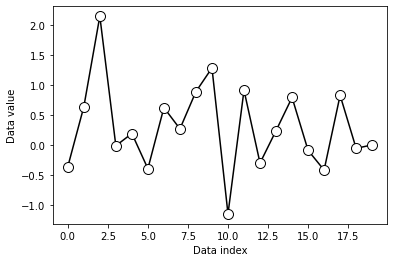

In [3]:
# plot to see what the data look(s) like
plt.plot(data,'ko-',markerfacecolor='w',markersize=10)
plt.xlabel('Data index')
plt.ylabel('Data value')
plt.show()

### "Manual code" t-test


In [4]:
# The null-hypohesis value
H0_val = 0

# compute the t-value
t_num = np.mean(data) -H0_val
t_den = np.std(data) / np.sqrt(N)
t_val = t_num / t_den

# degrees of freedom
df = N -1

# p-val
pval = - stats.t.cdf(abs(t_val), df)

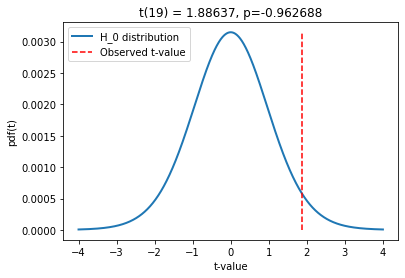

In [5]:
# show the H0 parameter distribution and observed t-value
x = np.linspace(-4,4,1001)
tdist = stats.t.pdf(x,df) * np.mean(np.diff(x))

plt.plot(x,tdist,linewidth=2)
plt.plot([t_val,t_val],[0,max(tdist)],'r--')
plt.legend(('H_0 distribution','Observed t-value'))
plt.xlabel('t-value')
plt.ylabel('pdf(t)')
plt.title('t(%g) = %g, p=%g'%(df,t_val,pval))
plt.show()

### Two-samples t-test

In [6]:
# parameters
n1 = 30    
n2 = 40   
mu1 = 1   # population mean in dataset 1
mu2 = 1.2 # population mean in dataset 2

In [7]:
# generate the data
data1 = mu1 + np.random.randn(n1)
data2 = mu2 + np.random.randn(n2)

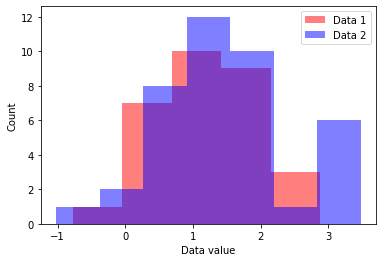

In [8]:
# show their histograms
plt.hist(data1,bins='fd',color=[1,0,0,.5],label='Data 1')
plt.hist(data2,bins='fd',color=[0,0,1,.5],label='Data 2')
plt.xlabel('Data value')
plt.ylabel('Count')
plt.legend()
plt.show()

#### The t-test

In [9]:
t,p = stats.ttest_ind(data1,data2,equal_var=True)

df = n1+n2-2
print('t(%g) = %g, p=%g'%(df,t,p))

t(68) = -1.50047, p=0.138121


#### 2D space of t values

In [10]:
# ranges for t-value parameters
meandiffs = np.linspace(-3,3,80)
pooledvar = np.linspace(.5,4,100)

# group sample size
n1 = 40
n2 = 30

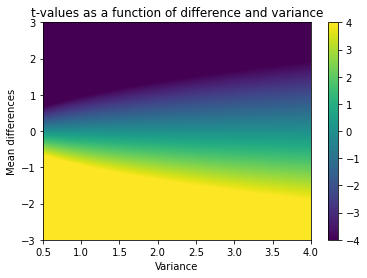

In [11]:
# group sample size
n1 = 40
n2 = 30

# initialize output matrix
allTvals = np.zeros((len(meandiffs),len(pooledvar)))

# loop over the parameters...
for meani in range(len(meandiffs)):
    for vari in range(len(pooledvar)):
        
        # t-value denominator
        df = n1 + n2 - 2
        s  = np.sqrt(( (n1-1)*pooledvar[vari] + (n2-1)*pooledvar[vari]) / df)
        t_den = s * np.sqrt(1/n1 + 1/n2)
        
        # t-value in the matrix
        allTvals[meani,vari] = meandiffs[meani] / t_den

        
plt.imshow(allTvals,vmin=-4,vmax=4,extent=[pooledvar[0],pooledvar[-1],meandiffs[0],meandiffs[-1]],aspect='auto')
plt.xlabel('Variance')
plt.ylabel('Mean differences')
plt.colorbar()
plt.title('t-values as a function of difference and variance')
plt.show()

### Signed-rank test (Wilcoxon signed-rank for one-sample or paired samples)

#### Generate the data

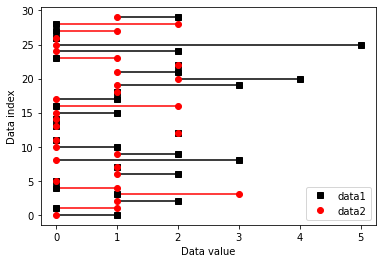

In [12]:
N = 30

data1 = np.random.poisson(1.5,N)
data2 = np.random.poisson(1,N)

colors = 'kr'
for i in range(N):
    plt.plot([data1[i], data2[i]],[i, i],colors[int(data1[i]<data2[i])])

plt.plot(data1,np.arange(N),'ks',markerfacecolor='k',label='data1')
plt.plot(data2,np.arange(N),'ro',markerfacecolor='r',label='data2')

plt.ylabel('Data index')
plt.xlabel('Data value')
plt.legend()

plt.show()

In [13]:
t,p = stats.wilcoxon(data1,data2)
print('Wilcoxon z=%g, p=%g'%(t,p))

Wilcoxon z=77.5, p=0.173048


#### The 2D space

In [15]:
# parameter ranges
Ns = np.arange(5,51)
lambdas = np.linspace(1,3,40)

# initialize output matrix
pvals = np.zeros((len(Ns),len(lambdas)))

for ni in range(len(Ns)):
    for li in range(len(lambdas)):
        
        # generate some data
        data1 = np.random.poisson(lambdas[0], Ns[ni])
        data2 = np.random.poisson(lambdas[li],Ns[ni])
        
        # compute the statistic
        t,p = stats.wilcoxon(data1,data2)
        
        # store the results
        pvals[ni,li] = -np.log(p)

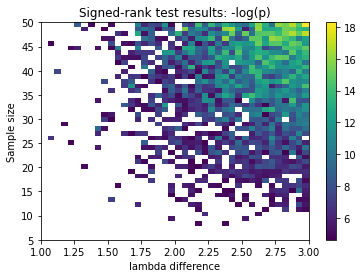

In [16]:
# optional p-value thresholding
pvalthresh = .01
pvals[ pvals<-np.log(pvalthresh) ] = np.NaN


# now show in a heatmap!
plt.imshow(pvals,origin='lower',extent=[lambdas[0],lambdas[-1],Ns[0],Ns[-1]],aspect='auto')
plt.xlabel('lambda difference')
plt.ylabel('Sample size')
plt.title('Signed-rank test results: -log(p)')
plt.colorbar()
plt.show()

### Mann-Whitney U test

#### Generate the data

In [17]:
N1 = 30
N2 = 45

data1 = np.random.poisson(2, N1)
data2 = np.random.poisson(1, N2)

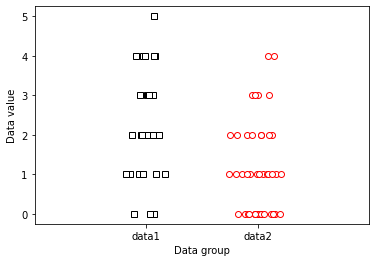

In [18]:
plt.plot(1+np.random.randn(N1)/10, data1, 'ks', markerfacecolor='w')
plt.plot(2+np.random.randn(N2)/10, data2, 'ro', markerfacecolor='w')

plt.xlim([0,3])
plt.xticks([1,2], labels=('data1', 'data2'))
plt.xlabel('Data group')
plt.ylabel('Data value')
plt.show()

#### For the test


In [19]:
U,p = stats.mannwhitneyu(data1, data2)
print(f'The values of U and p are {U,p} respectively.')

The values of U and p are (354.5, 0.00018864806778027692) respectively.


### Permutation testing

#### Simulate two distributions

In [20]:
# number of trials
N = 100

# dataset "A"
r = np.random.randn(N)
r[r>0] = np.log(1+r[r>0])
dataA = 26-r*10

In [21]:
# get histogram values for later comparison
yA,xA = np.histogram(dataA,20)
xA = (xA[:-1]+xA[1:])/2

In [22]:
# dataset "B"
r = np.random.randn(N)
r[r>0] = np.log(1+r[r>0])
dataB = 30-r*10

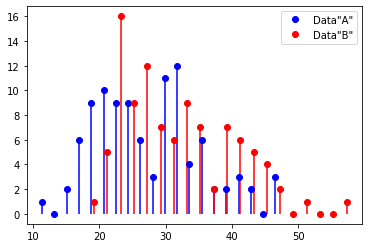

In [23]:
#get histogram values for later comparison
yB,xB = np.histogram(dataB,20)
xB = (xB[:-1]+xB[1:])/2


plt.stem(xA,yA,'b',markerfmt='bo',basefmt=' ',label='Data"A"')
plt.stem(xB,yB,'r',markerfmt='ro',basefmt=' ',label='Data"B"')
plt.legend()
plt.show()

#### Mix trials together

In [24]:
# concatenate trials
alldata = np.hstack((dataA,dataB))

# condition labels
conds = np.hstack((np.ones(N),2*np.ones(N)))

#### Generate one null hypothesis scenario

In [25]:
# random permutation
fakeconds = np.random.permutation(N*2)

# shuffled condition labels
fakeconds[fakeconds<N] = 1
fakeconds[fakeconds>1] = 2


# these two means should be different.
print([np.mean(alldata[conds==1]), np.mean(alldata[conds==2])])

# should these two be different?
print([np.mean(alldata[fakeconds==1]), np.mean(alldata[fakeconds==2])])

[27.381349339454058, 31.776241739355626]
[29.408783680942054, 29.748807397867623]


#### Distribution of null hypothesis values

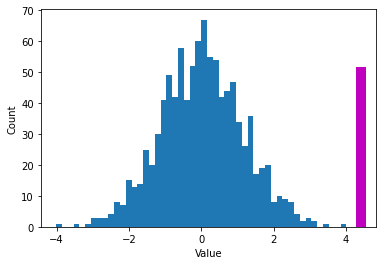

In [26]:
nPerms = 1000
permdiffs = np.zeros(nPerms)

for permi in range(nPerms):
    fconds = np.random.permutation(N*2)
    fconds[fconds<N] = 1
    fconds[fconds>1] = 2
    permdiffs[permi] = np.mean(alldata[fconds==2]) - np.mean(alldata[fconds==1])


# plot the distribution of H0 values
plt.hist(permdiffs,50)

# and plot the observed value on top
obsval = np.mean(alldata[conds==2]) - np.mean(alldata[conds==1])
plt.plot([obsval, obsval],[0, 50],'m',linewidth=10)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

#### Methods of evaluating statistical significance

In [27]:
# Z-value
zVal = ( obsval-np.mean(permdiffs) ) / np.std(permdiffs,ddof=1)
p = 1-stats.norm.cdf(abs(zVal))

# p-value count
pCount = sum(permdiffs>obsval)/nPerms

print(p,pCount)

6.494868876472104e-05 0.0
